# CS530 Quiz 2

In [1]:
# make datasets
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The first module is devoted to regression and regularization, which we learned in the context of linear regression. Although this technique is ubiquitous in machine learning and deep learning. The main idea behind regularization, as we discussed in class, is that—when successful—it greatly decrease the variance of a model for the price of just a small increase to the bias: 
$$ MSE = [Bias(\hat{f}(x_0))]^2 + Var(\hat{f}(x_0)) + Var(\epsilon) $$ Or
$$ Err(x) = (E[\hat{f}(x)]-f(x))^2 + E[(\hat{f}(x)-E[\hat{f}(x)])^2] + \sigma_{\epsilon}^2 $$

From the above it is clear that if the variance decreases more than the bias increases, the overall error on the test set (the MSE) decreases, which is what we want. 

1. Read the code below, which describes part of a simulation in the context of the bias-variance discussion above.

  (a) Explain what each of the following variables represent in the code: "X", "f_x", "eps", and "y".

  (b) For the dataset described by this code, would you expect the variance to be high or low? Explain your answer. 


In [2]:
np.random.seed(42)
n_informative = 25
x_dims = [1000, n_informative]
beta_0 = 10
eps_std = 20;

X = np.random.normal(size=x_dims)
for k in range(0, 12):
    noise = np.random.normal(0,0.1,size=(x_dims[0],1)).reshape(-1)
    X[:,-(k+1)]=X[:,k] + noise
f_x = np.sum(100*X[:,:n_informative], axis=1) + beta_0
eps = np.random.normal(0,eps_std,size=(x_dims[0],1)).reshape(-1)
y = f_x + eps


a) 

X: This the data drawn from a random normal sample. It has 25 features and 1000 rows. In addition, there is some added noise to X shown in the for loop.

f_x: This is the true model of the data, found by summing X*100 and then adding 10. This is the model we are trying to achieve.

eps: This is irreducible error drawn from a random normal sample with a standard deviation of 20. It is purely random and does not play factor into the true model (f_x does not rely on eps).

y: These would be the y labels given in the dataset, found by the summation of the true model and some irrecuible error.

b)

I would expect the variance to be fairly high since there is a considerable amount of noise brought into the model.

2. Say that we fit a ridge regression model on this data set, as we learned in class.

  (a) What would happen to the coefficients of the model (i.e., the $\hat \beta$') as you increase the value of the regularization parameter, $\alpha$ (or, in the class slides $\lambda$)? 
  
  (b) How do you expect that bias and variance of the fitted model would change as $\alpha$ increases? And how would the MSE change? Explain the reasoning behind your answers.

a)

The coefficients would approach 0 as alpha increases since the model would become increasingly regularized.

b)

The bias will increase while the variance will decrease as alpha increases (point of regularization is to increase bias slightly in order to decrease variance signifcantly). The MSE as such would decrease for awhile and then increase. The reason for this is because, since a small increase in bias leads to a large decrease in variance, the MSE will decrease for awhile. However, once bias is too large, it will begin to increase again.

3. After simulating 1000 these datasets, you are able to estimate the bias and variance for ridge regression models on each of the selected $\alpha$'s. When you plot the variance and bias over the $\alpha$ paramter, you get the following output:

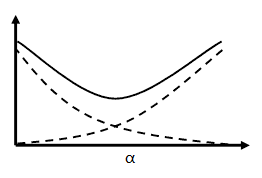

Explain which part of the plot shows the bias, variance, MSE and irreducible error.




The MSE is the U shaped line (decreases and then increases). The bias is the dotted line that is increasing as alpha increases. The variance is the dotted line that is decreasing as alpha increases. The irreducible error should be a constant line somewhere below the minimum of the MSE (irreducible error <= minimum MSE) 

4. We learned about using cross-validation to find the best $\alpha$ parameter for ridge regression in our class. Can you also use this bias and variance trade-off method to find the best $\alpha$ parameter for real-life datasets? Explain.

You could use this method on real life data, but there are certain factors that need to be taken into consideration. For one, if your dataset is large enough or if your model is already simple, regularization is probably not needed. However, if you have a large number of parameters and a complex model regularization would be appropriate. The reason for this is because regularization would help prevent against overfitting and would reduce the number of parameters (assuming the alpha is large enough). Using cross validation to do this would help strengthen the accuracy of the optimal alpha to use.